In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
os.chdir("G:\\kaggle data set\\Flight Price Prediction")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)

In [2]:
os.getcwd()

'G:\\kaggle data set\\Flight Price Prediction'

In [3]:
train_df = pd.read_excel("Data_Train.xlsx")
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
#Check NAN Values

train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
# Only Two NAN Values are in Train_df , so drop these.

train_df = train_df.dropna()
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [7]:
# After droping Check NAN again

train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA

Date_of_Journey,Dep_Time,Arrival_Time columns are object column as mention in Dataset information,                              Therefore we have to convert these datatype into Timestamp 

In [8]:
train_df["Date_of_Journey"].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [9]:
#Extract Day from Date_of_Journey Column

train_df["Journey_Day"] = pd.to_datetime(train_df.Date_of_Journey , format="%d/%m/%Y").dt.day

#Extract Month from Date_of_Journey Column

train_df["Journey_Month"] = pd.to_datetime(train_df.Date_of_Journey , format="%d/%m/%Y").dt.month

#Now Drop Date_of_Journey column

train_df = train_df.drop(["Date_of_Journey"],axis=1)
train_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [10]:
#check How many unique values are in Journey_Month

train_df["Journey_Month"].unique()

array([3, 5, 6, 4], dtype=int64)

This Data contain records of MARCH, APRIL, MAY, JUNE (2019), so no need to handle Year.

In [11]:
#Extract Hour from Dep_Time Column

train_df["Dep_hour"] = pd.to_datetime(train_df.Dep_Time ).dt.hour

#Extract Minutes from Dep_Time Column
train_df["Dep_min"] = pd.to_datetime(train_df.Dep_Time ).dt.minute

#Now Drop Dep_Time column
train_df = train_df.drop(["Dep_Time"],axis=1)
train_df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


In [12]:
#Extract Hour from Arrival_Time Column
train_df["Arrival_hour"] = pd.to_datetime(train_df.Arrival_Time ).dt.hour

#Extract Minutes from Arrival_Time Column
train_df["Arrival_min"] = pd.to_datetime(train_df.Arrival_Time ).dt.minute

#Now Drop Arrival_Time column
train_df = train_df.drop(["Arrival_Time"],axis=1)
train_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [13]:
# Duration is difference between Departure Time and Arrival Time. and Duration column is Object , so we have to change into Timestamp.



duration = list(train_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

    
duration_hour = []
duration_minutes = []


for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep="h")[0]))                   ## Extract hours from Duration column
    duration_minutes.append(int(duration[i].split(sep="m")[0].split()[-1]))    ## Extract hours from Duration column

In [14]:
#Adding duration_hour and  duration_minutes in train_df.

train_df["Duration_hour"] = duration_hour
train_df["Duration_minutes"] = duration_minutes

In [15]:
#Now Drop Duration column
train_df = train_df.drop(["Duration"],axis=1)
train_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


# Handle Categorical columns

Airline

In [16]:
train_df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

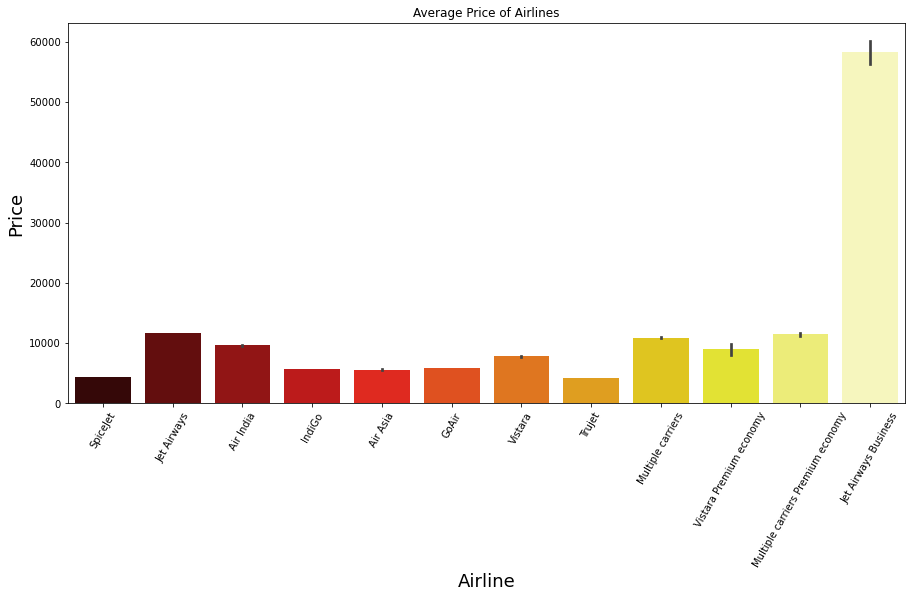

In [17]:
#Average Price for all Airline's

plt.figure(figsize=(15,7))
sns.barplot("Airline", y = "Price",data=train_df.sort_values("Price"),palette="hot",ci=30,estimator=np.mean)
plt.title("Average Price of Airlines")
plt.xlabel("Airline" , fontsize=18)
plt.ylabel("Price" , fontsize=18)
plt.xticks(rotation=60)

<Figure size 1080x720 with 0 Axes>

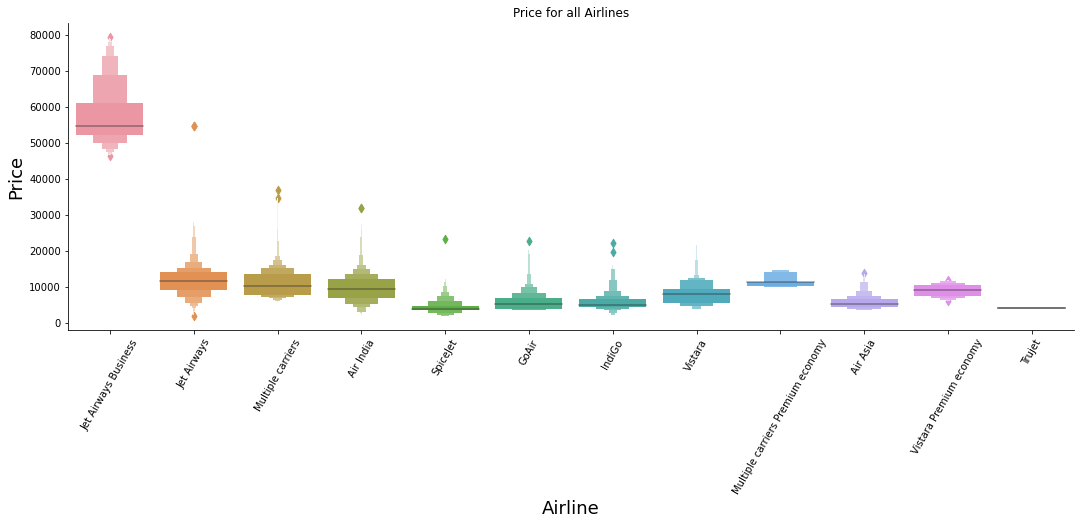

In [18]:
# Price for all Airline's

plt.figure(figsize=(15,10))
sns.catplot("Airline", y = "Price",data=train_df.sort_values("Price",ascending=False),kind="boxen",ci=30,aspect=3)
plt.title("Price for all Airlines")
plt.xlabel("Airline" , fontsize=18)
plt.ylabel("Price" , fontsize=18)
plt.xticks(rotation=60)
plt.show()

# catplot like boxplot

Source

In [19]:
train_df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [20]:
train_df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

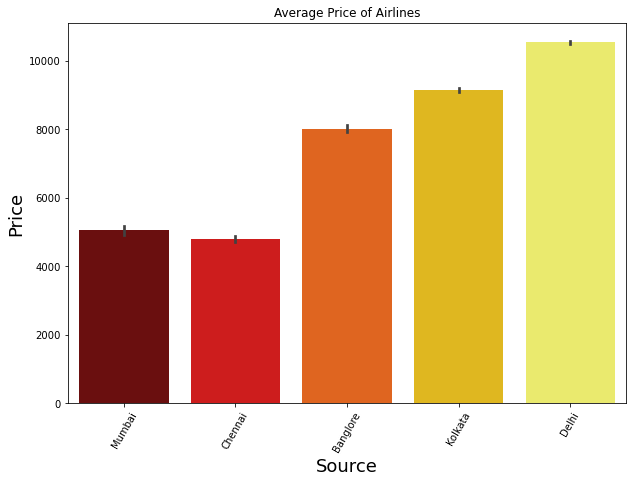

In [21]:
#Average Price for all Source

plt.figure(figsize=(10,7))
sns.barplot(x = "Source", y = "Price",data=train_df.sort_values("Price"),palette="hot",ci=60,estimator=np.mean)
plt.title("Average Price of Airlines")
plt.xlabel("Source" , fontsize=18)
plt.ylabel("Price" , fontsize=18)
plt.xticks(rotation=60)

<Figure size 1080x720 with 0 Axes>

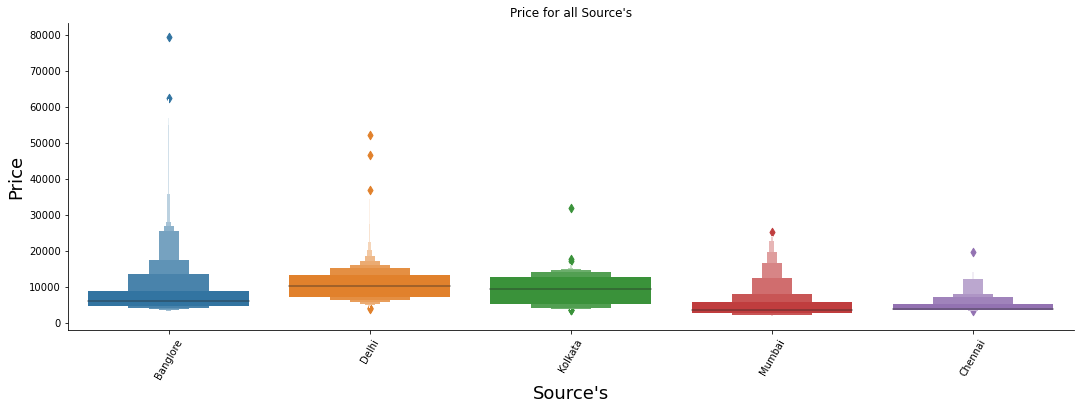

In [22]:
# Price for all Source's

plt.figure(figsize=(15,10))
sns.catplot(x="Source", y = "Price",data=train_df.sort_values("Price",ascending=False),kind="boxen",ci=30,aspect=3)
plt.title("Price for all Source's")
plt.xlabel("Source's" , fontsize=18)
plt.ylabel("Price" , fontsize=18)
plt.xticks(rotation=60)
plt.show()


# catplot like boxplot

Destination

In [23]:
train_df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [24]:
train_df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [25]:
#New Delhi and Delhi both are same so New Delhi change by Delhi.
train_df.loc[train_df["Destination"]=="New Delhi","Destination"] = "Delhi"


#Check again unique Values
train_df["Destination"].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [26]:
train_df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

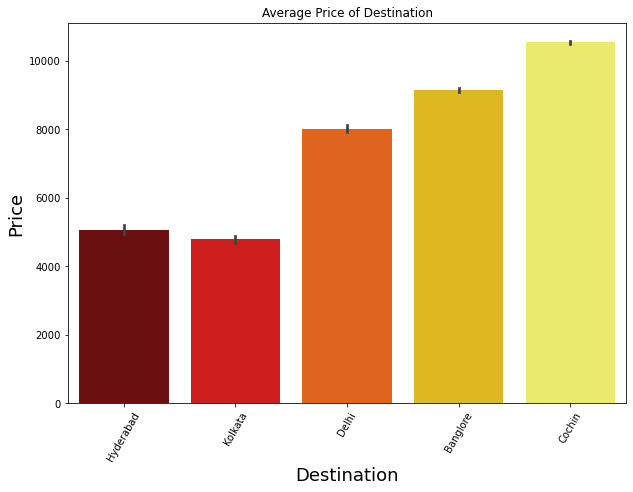

In [27]:
#Average Price for all Source

plt.figure(figsize=(10,7))
sns.barplot(x = "Destination", y = "Price",data=train_df.sort_values("Price"),palette="hot",ci=60,estimator=np.mean)
plt.title("Average Price of Destination")
plt.xlabel("Destination" , fontsize=18)
plt.ylabel("Price" , fontsize=18)
plt.xticks(rotation=60)

<Figure size 1080x720 with 0 Axes>

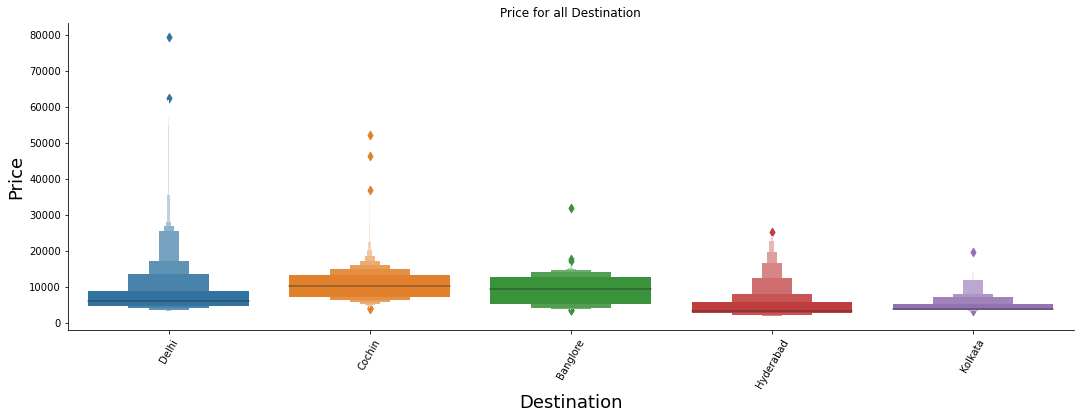

In [28]:
# Price for all Destination's

plt.figure(figsize=(15,10))
sns.catplot(x="Destination", y = "Price",data=train_df.sort_values("Price",ascending=False),kind="boxen",ci=30,aspect=3)
plt.title("Price for all Destination")
plt.xlabel("Destination" , fontsize=18)
plt.ylabel("Price" , fontsize=18)
plt.xticks(rotation=60)
plt.show()


# catplot like boxplot

In [29]:
train_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_minutes
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


Additional_Info

In [30]:
train_df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [31]:
train_df["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [32]:
#Additional_Info Feature has more than 78% (no info) value , thus drop Additional_Info feature

train_df = train_df.drop(["Additional_Info"],axis=1)

In [33]:
print(train_df["Route"].unique())

['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG → BLR' 'BLR → NAG → DEL' 'CCU → BLR' 'BLR → BOM → DEL'
 'DEL → BOM → COK' 'DEL → BLR → COK' 'MAA → CCU' 'CCU → BOM → BLR'
 'DEL → AMD → BOM → COK' 'DEL → PNQ → COK' 'DEL → CCU → BOM → COK'
 'BLR → COK → DEL' 'DEL → IDR → BOM → COK' 'DEL → LKO → COK'
 'CCU → GAU → DEL → BLR' 'DEL → NAG → BOM → COK' 'CCU → MAA → BLR'
 'DEL → HYD → COK' 'CCU → HYD → BLR' 'DEL → COK' 'CCU → DEL → BLR'
 'BLR → BOM → AMD → DEL' 'BOM → DEL → HYD' 'DEL → MAA → COK' 'BOM → HYD'
 'DEL → BHO → BOM → COK' 'DEL → JAI → BOM → COK' 'DEL → ATQ → BOM → COK'
 'DEL → JDH → BOM → COK' 'CCU → BBI → BOM → BLR' 'BLR → MAA → DEL'
 'DEL → GOI → BOM → COK' 'DEL → BDQ → BOM → COK' 'CCU → JAI → BOM → BLR'
 'CCU → BBI → BLR' 'BLR → HYD → DEL' 'DEL → TRV → COK'
 'CCU → IXR → DEL → BLR' 'DEL → IXU → BOM → COK' 'CCU → IXB → BLR'
 'BLR → BOM → JDH → DEL' 'DEL → UDR → BOM → COK' 'DEL → HYD → MAA → COK'
 'CCU → BOM → COK → BLR' 'BLR → CCU → DEL' 'CCU → BOM → GOI → 

In [34]:
train_df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [35]:
# Route and Total_Stops having same Information so Drop one column 

train_df = train_df.drop(["Route"],axis=1)
train_df

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_minutes
0,IndiGo,Banglore,Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1 stop,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,Delhi,non-stop,12648,1,3,11,30,14,10,2,40


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

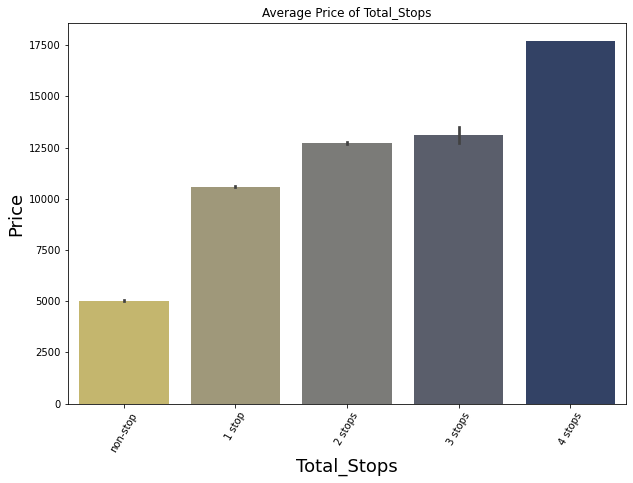

In [36]:
#Average Price for all Total_Stops

plt.figure(figsize=(10,7))
sns.barplot(x = "Total_Stops", y = "Price",data=train_df.sort_values("Price"),palette="cividis_r",ci=60,estimator=np.mean)
plt.title("Average Price of Total_Stops")
plt.xlabel("Total_Stops" , fontsize=18)
plt.ylabel("Price" , fontsize=18)
plt.xticks(rotation=60)

Total_Stops having a Ordinal Values so change it into ordinal categorey.and cleared from Graph as number of stops increases price also increases.

In [37]:
ordinal_values = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

train_df["Total_Stops"] = train_df["Total_Stops"].map(ordinal_values)
train_df

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_minutes
0,IndiGo,Banglore,Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,Delhi,0,12648,1,3,11,30,14,10,2,40


In [38]:
# Airline,Source,Destination Features are Nominal categorey so change into dummies varialbes.

train_dummy_df = pd.get_dummies(train_df,drop_first=True)
train_dummy_df

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10681,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


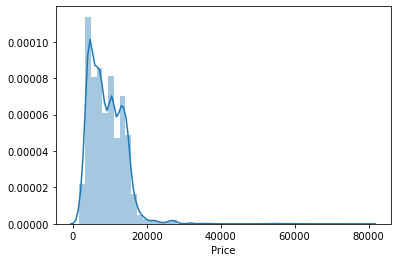

In [39]:
#Distribution of Price(Target) Feature

sns.distplot(train_df["Price"])

In [40]:
#Split Independent and Dependent Features

x_df = train_dummy_df.drop(["Price"],axis=1)

y_df = train_dummy_df["Price"]
x_df

,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10679,0,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10680,0,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10681,0,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [41]:
#Taking all continuous features for checking correlation between these features.
x_df_continuous = x_df[["Journey_Day","Journey_Month","Dep_hour","Dep_min",
                        "Arrival_hour","Arrival_min","Duration_hour","Duration_minutes"]]
x_df_continuous

,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_minutes
0,24,3,22,20,1,10,2,50
1,1,5,5,50,13,15,7,25
2,9,6,9,25,4,25,19,0
3,12,5,18,5,23,30,5,25
4,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...
10678,9,4,19,55,22,25,2,30
10679,27,4,20,45,23,20,2,35
10680,27,4,8,20,11,20,3,0
10681,1,3,11,30,14,10,2,40


# Feature Selection

check correlation between continuous features

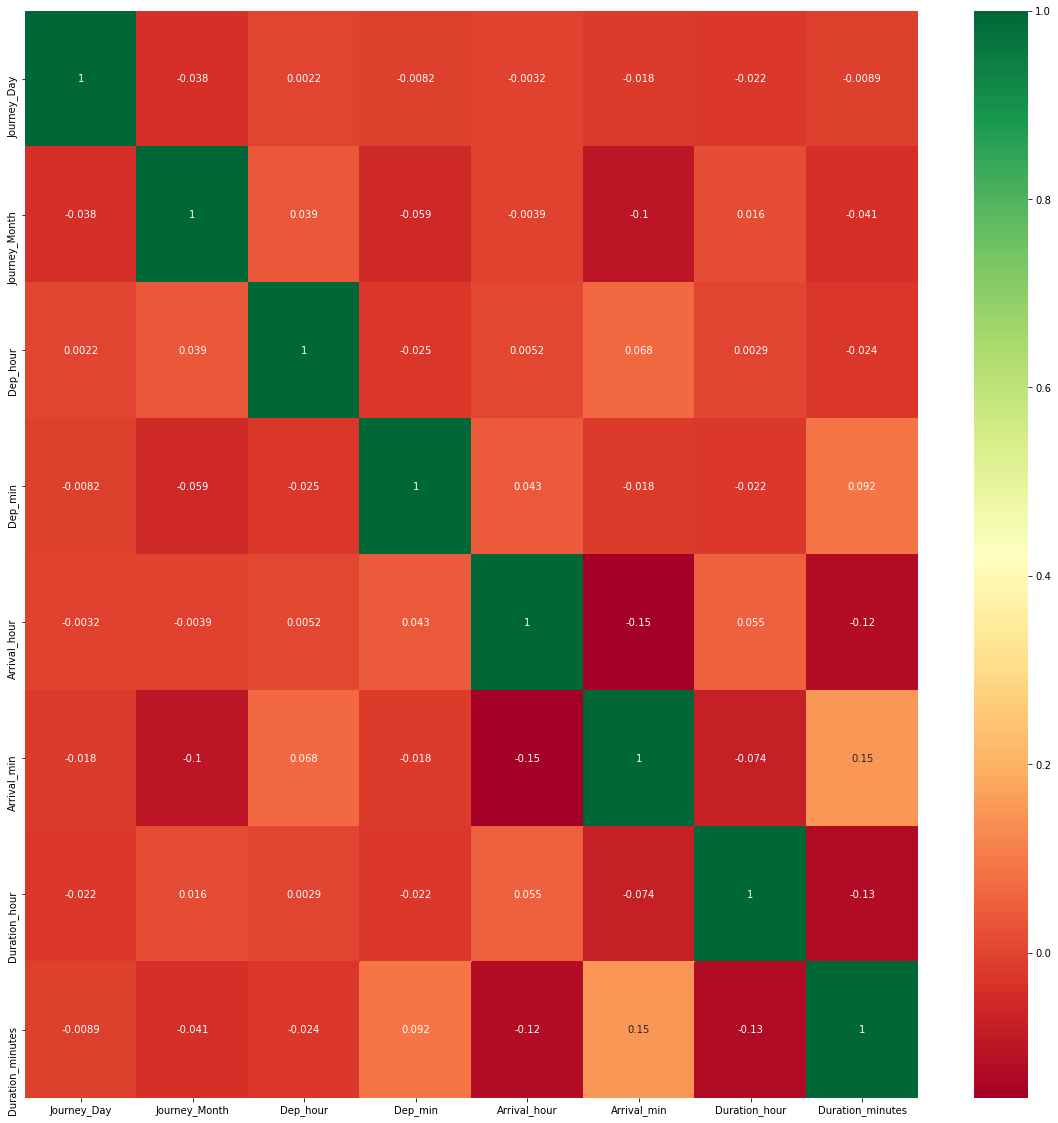

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(x_df_continuous.corr(),annot=True,cmap="RdYlGn")

In [43]:
corr_col = []
corr_matrix = x_df_continuous.corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j])>0.8:
            col_name=corr_matrix.columns[i]
            corr_col.append(col_name)
print(corr_col)

[]


# Important Features

In [44]:
from sklearn.ensemble import ExtraTreesRegressor

In [45]:
model = ExtraTreesRegressor()
model.fit(x_df,y_df)

ExtraTreesRegressor()

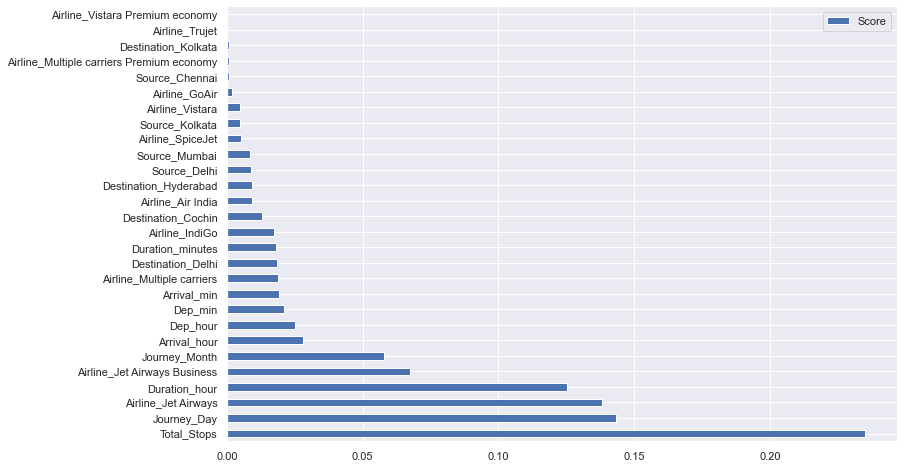

In [46]:
tree_score = pd.DataFrame(model.feature_importances_,index=x_df.columns ,columns=["Score"])
tree_sort = tree_score.sort_values("Score",ascending=False)
sns.set(style="darkgrid")
tree_sort.plot(kind="barh",figsize=(12,8))

#Select Top_20 Features.

In [47]:
top_20_features = tree_score.sort_values("Score",ascending=False).head(20)
top_20_features.index

Index(['Total_Stops', 'Journey_Day', 'Airline_Jet Airways', 'Duration_hour',
       'Airline_Jet Airways Business', 'Journey_Month', 'Arrival_hour',
       'Dep_hour', 'Dep_min', 'Arrival_min', 'Airline_Multiple carriers',
       'Destination_Delhi', 'Duration_minutes', 'Airline_IndiGo',
       'Destination_Cochin', 'Airline_Air India', 'Destination_Hyderabad',
       'Source_Delhi', 'Source_Mumbai', 'Airline_SpiceJet'],
      dtype='object')

In [48]:
new_x_df = x_df[top_20_features.index]
new_x_df

,Total_Stops,Journey_Day,Airline_Jet Airways,Duration_hour,Airline_Jet Airways Business,Journey_Month,Arrival_hour,Dep_hour,Dep_min,Arrival_min,Airline_Multiple carriers,Destination_Delhi,Duration_minutes,Airline_IndiGo,Destination_Cochin,Airline_Air India,Destination_Hyderabad,Source_Delhi,Source_Mumbai,Airline_SpiceJet
0,0,24,0,2,0,3,1,22,20,10,0,1,50,1,0,0,0,0,0,0
1,2,1,0,7,0,5,13,5,50,15,0,0,25,0,0,1,0,0,0,0
2,2,9,1,19,0,6,4,9,25,25,0,0,0,0,1,0,0,1,0,0
3,1,12,0,5,0,5,23,18,5,30,0,0,25,1,0,0,0,0,0,0
4,1,1,0,4,0,3,21,16,50,35,0,1,45,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,0,2,0,4,22,19,55,25,0,0,30,0,0,0,0,0,0,0
10679,0,27,0,2,0,4,23,20,45,20,0,0,35,0,0,1,0,0,0,0
10680,0,27,1,3,0,4,11,8,20,20,0,1,0,0,0,0,0,0,0,0
10681,0,1,0,2,0,3,14,11,30,10,0,1,40,0,0,0,0,0,0,0


In [49]:
#Split Train_Dataset and Test_Dataset 
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test = train_test_split(new_x_df,y_df,test_size=0.25,random_state=0)

Model Building by RandomForest

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

In [52]:
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [53]:
gb_model.score(x_train,y_train)

0.78366288944483

In [54]:
#Prediction on Test Dataset
gb_prediciton = gb_model.predict(x_test)
gb_prediciton

array([12226.27827387,  6347.98415968,  4451.07158721, ...,
        9700.02744807,  6827.68569875,  8878.34287971])

In [55]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from math import sqrt

In [56]:
r2_score(y_test,gb_prediciton)

0.7515811921038421

In [57]:
print("MAE:",mean_absolute_error(y_test,gb_prediciton))
print("MSE:",mean_squared_error(y_test,gb_prediciton))
print("RMSE:",sqrt(mean_squared_error(y_test,gb_prediciton)))

MAE: 1578.8388042227173
MSE: 5604152.913487897
RMSE: 2367.3092137462518


# Randomized Search CV

In [58]:
from sklearn.model_selection import RandomizedSearchCV

In [59]:
gb_model = GradientBoostingRegressor()

In [60]:
param_dist = {"n_estimators":[100,200,500,600,800],
              "max_depth":[3,5,10,20,25],"min_samples_leaf":[1,3,5,7],
               "min_samples_split" : [3,5,8,10,12],
             "learning_rate":[0.01,0.1,0.3,0.5,0.7]}
                     
rdm_search = RandomizedSearchCV(gb_model,param_distributions=param_dist,n_jobs=-1 , n_iter=15,cv=10,verbose=5)
rdm_search.fit(new_x_df,y_df)


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 10.3min finished


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.3, 0.5,
                                                          0.7],
                                        'max_depth': [3, 5, 10, 20, 25],
                                        'min_samples_leaf': [1, 3, 5, 7],
                                        'min_samples_split': [3, 5, 8, 10, 12],
                                        'n_estimators': [100, 200, 500, 600,
                                                         800]},
                   verbose=5)

In [61]:
rdm_search.best_params_

{'n_estimators': 800,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_depth': 5,
 'learning_rate': 0.1}

In [62]:
rdm_search.best_score_

0.8436275722708171

In [63]:
#Prediction on Test Dataset
rdm_gb_prediciton = rdm_search.predict(x_test)
rdm_gb_prediciton

array([12651.39412791,  6246.01048156,  3570.40039753, ...,
        7965.17664222,  6231.20232394,  7162.62789925])

In [64]:
r2_score(y_test,rdm_gb_prediciton)

0.9355305960946398

In [65]:
print("MAE:",mean_absolute_error(y_test,rdm_gb_prediciton))
print("MSE:",mean_squared_error(y_test,rdm_gb_prediciton))
print("RMSE:",sqrt(mean_squared_error(y_test,rdm_gb_prediciton)))

MAE: 833.0561494716757
MSE: 1454384.2343776098
RMSE: 1205.9785381082077


In [66]:
df['jsdcb']

NameError: name 'df' is not defined

In [ ]:
import pickle

In [ ]:
pickle.dump(rdm_search,open("gb_model.pickle","wb"))

In [ ]:
rf_model = pickle.load(open("gb _model.pickle","rb"))

In [ ]:
rf_model.predict(x_test)